<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_code_kata/blob/master/cifar_10_cnn_32_32_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from PIL import Image
import IPython.display as ipd

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
X_train,X_test=np.divide(X_train,255.0),np.divide(X_test,255.0)

y_train,y_test=np.asarray(y_train).astype('float32').reshape((-1,1)),np.asarray(y_test).astype('float32').reshape((-1,1))
y_train,y_test=tf.one_hot(y_train,10),tf.one_hot(y_test,10)
y_train,y_test=np.array(y_train),np.array(y_test)
y_train,y_test=y_train.reshape(-1,10),y_test.reshape(-1,10)

In [5]:
model=Sequential(
    name='model_mnist'
)

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

model.build(input_shape=X_train.shape)

In [6]:
model.summary()

Model: "model_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (50000, 32, 32, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (50000, 16, 16, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (50000, 16, 16, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (50000, 8, 8, 32)         0         
_________________________________________________________________
flatten (Flatten)            (50000, 2048)             0         
_________________________________________________________________
dense (Dense)                (50000, 10)               20490     
Total params: 30,634
Trainable params: 30,634
Non-trainable params: 0
___________________________________________________

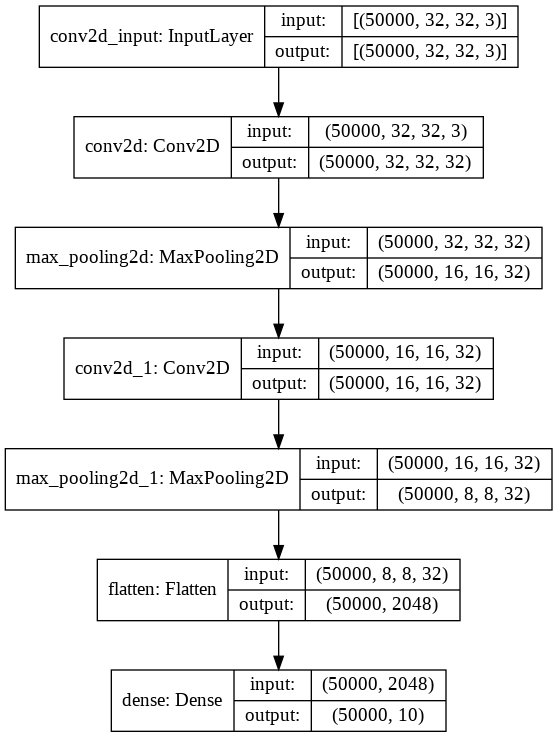

In [7]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.fit(X_train,y_train,batch_size=128,epochs=5)

Epoch 1/5
391/391 [==============================] - 50s 127ms/step - loss: 1.8623 - accuracy: 0.3335
Epoch 2/5
391/391 [==============================] - 50s 128ms/step - loss: 1.3196 - accuracy: 0.5375
Epoch 3/5
391/391 [==============================] - 50s 129ms/step - loss: 1.1936 - accuracy: 0.5835
Epoch 4/5
391/391 [==============================] - 51s 129ms/step - loss: 1.1000 - accuracy: 0.6164
Epoch 5/5
391/391 [==============================] - 51s 131ms/step - loss: 1.0350 - accuracy: 0.6434


In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.0548 - accuracy: 0.6355


[1.0548256635665894, 0.6355000138282776]

In [11]:
label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
#https://note.nkmk.me/python-pillow-add-margin-expand-canvas/
def add_margin(pil_img,top,right,bottom,left,color):
  width,height=pil_img.size
  new_width=width+right+left
  new_height=height+top+bottom
  result=Image.new(pil_img.mode,(new_width,new_height),color)
  result.paste(pil_img,(left,top))
  return result

--2021-01-15 01:29:00--  https://www.newcartestdrive.com/wp-content/uploads/2020/04/2020_Dodge_Challenger_hero-600x400.jpg
Resolving www.newcartestdrive.com (www.newcartestdrive.com)... 104.21.7.61, 172.67.187.132, 2606:4700:3031::6815:73d, ...
Connecting to www.newcartestdrive.com (www.newcartestdrive.com)|104.21.7.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54443 (53K) [image/jpeg]
Saving to: ‘2020_Dodge_Challenger_hero-600x400.jpg’

2020_Dodge_Challeng 100%[===================>]  53.17K  --.-KB/s    in 0s      

2021-01-15 01:29:00 (116 MB/s) - ‘2020_Dodge_Challenger_hero-600x400.jpg’ saved [54443/54443]



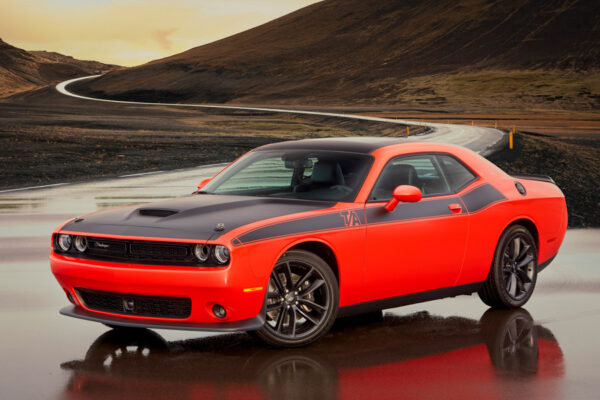

automobile


In [13]:
!wget https://www.newcartestdrive.com/wp-content/uploads/2020/04/2020_Dodge_Challenger_hero-600x400.jpg
img_path='2020_Dodge_Challenger_hero-600x400.jpg'
img=Image.open(img_path)
ipd.display(img)
w,h=img.size
pad_for_h=int((w-h)/2)
paded_img=add_margin(img,pad_for_h,0,pad_for_h,0,(0,0,0))
resized_img=paded_img.resize((32,32))
normalized_img=np.divide(resized_img,255.0)
x_img=np.array([normalized_img])
y_pred=model.predict(x_img)
print(label[y_pred.argmax()])

--2021-01-15 01:29:01--  https://bsmedia.business-standard.com/_media/bs/img/article/2019-10/15/full/1571086349-8577.jpg
Resolving bsmedia.business-standard.com (bsmedia.business-standard.com)... 23.40.197.203, 23.40.197.139, 2600:1409:12::6850:5889, ...
Connecting to bsmedia.business-standard.com (bsmedia.business-standard.com)|23.40.197.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41987 (41K) [image/jpeg]
Saving to: ‘1571086349-8577.jpg’

1571086349-8577.jpg 100%[===================>]  41.00K  --.-KB/s    in 0.1s    

2021-01-15 01:29:01 (396 KB/s) - ‘1571086349-8577.jpg’ saved [41987/41987]



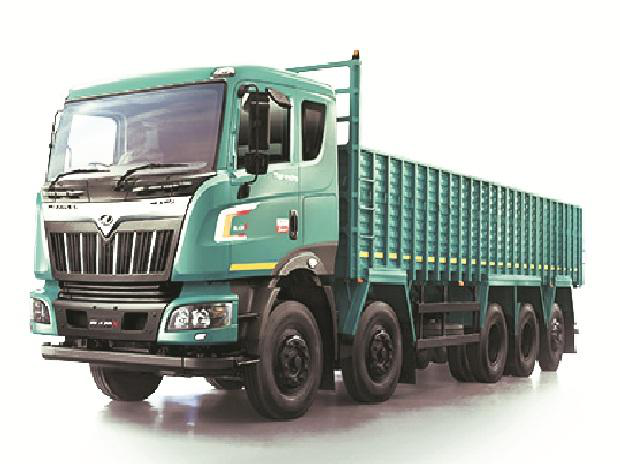

truck


In [14]:
!wget https://bsmedia.business-standard.com/_media/bs/img/article/2019-10/15/full/1571086349-8577.jpg&width=1200
img_path='1571086349-8577.jpg'
img=Image.open(img_path)
ipd.display(img)
w,h=img.size
pad_for_h=int((w-h)/2)
paded_img=add_margin(img,pad_for_h,0,pad_for_h,0,(0,0,0))
resized_img=paded_img.resize((32,32))
normalized_img=np.divide(resized_img,255.0)
x_img=np.array([normalized_img])
y_pred=model.predict(x_img)
print(label[y_pred.argmax()])

--2021-01-15 01:29:01--  https://dol.ismcdn.jp/mwimgs/c/8/670m/img_c8dad835c4b9134b067cc8b8efcab22f143142.jpg
Resolving dol.ismcdn.jp (dol.ismcdn.jp)... 14.0.41.244, 14.0.43.163, 14.0.44.211
Connecting to dol.ismcdn.jp (dol.ismcdn.jp)|14.0.41.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40703 (40K) [image/jpeg]
Saving to: ‘img_c8dad835c4b9134b067cc8b8efcab22f143142.jpg’

img_c8dad835c4b9134 100%[===================>]  39.75K  --.-KB/s    in 0.1s    

2021-01-15 01:29:02 (413 KB/s) - ‘img_c8dad835c4b9134b067cc8b8efcab22f143142.jpg’ saved [40703/40703]



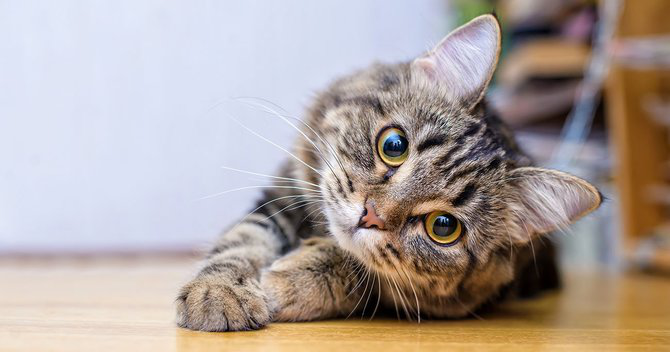

automobile


In [15]:
!wget https://dol.ismcdn.jp/mwimgs/c/8/670m/img_c8dad835c4b9134b067cc8b8efcab22f143142.jpg
img_path='img_c8dad835c4b9134b067cc8b8efcab22f143142.jpg'
img=Image.open(img_path)
ipd.display(img)
w,h=img.size
pad_for_h=int((w-h)/2)
paded_img=add_margin(img,pad_for_h,0,pad_for_h,0,(0,0,0))
resized_img=paded_img.resize((32,32))
normalized_img=np.divide(resized_img,255.0)
x_img=np.array([normalized_img])
y_pred=model.predict(x_img)
print(label[y_pred.argmax()])

--2021-01-15 01:29:02--  https://i1.wp.com/vgene.xyz/wp-content/uploads/2019/10/doga_20191026_01_00.jpg
Resolving i1.wp.com (i1.wp.com)... 192.0.77.2
Connecting to i1.wp.com (i1.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14037 (14K) [image/jpeg]
Saving to: ‘doga_20191026_01_00.jpg’

doga_20191026_01_00 100%[===================>]  13.71K  --.-KB/s    in 0s      

2021-01-15 01:29:02 (308 MB/s) - ‘doga_20191026_01_00.jpg’ saved [14037/14037]



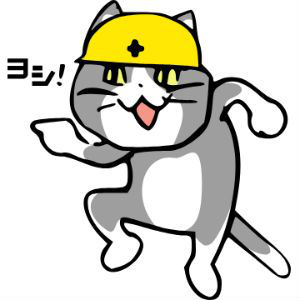

frog


In [16]:
!wget https://i1.wp.com/vgene.xyz/wp-content/uploads/2019/10/doga_20191026_01_00.jpg
img_path='doga_20191026_01_00.jpg'
img=Image.open(img_path)
ipd.display(img)
w,h=img.size
pad_for_h=int((w-h)/2)
paded_img=add_margin(img,pad_for_h,0,pad_for_h,0,(0,0,0))
resized_img=paded_img.resize((32,32))
normalized_img=np.divide(resized_img,255.0)
x_img=np.array([normalized_img])
y_pred=model.predict(x_img)
print(label[y_pred.argmax()])

--2021-01-15 01:29:02--  https://www.tv-tokyo.co.jp/txcms/media/others/1f/26/ae3084e212f5da80690e197f49a2.jpg
Resolving www.tv-tokyo.co.jp (www.tv-tokyo.co.jp)... 43.253.36.156
Connecting to www.tv-tokyo.co.jp (www.tv-tokyo.co.jp)|43.253.36.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14936 (15K) [image/jpeg]
Saving to: ‘ae3084e212f5da80690e197f49a2.jpg’

ae3084e212f5da80690 100%[===================>]  14.59K  --.-KB/s    in 0s      

2021-01-15 01:29:03 (63.0 MB/s) - ‘ae3084e212f5da80690e197f49a2.jpg’ saved [14936/14936]



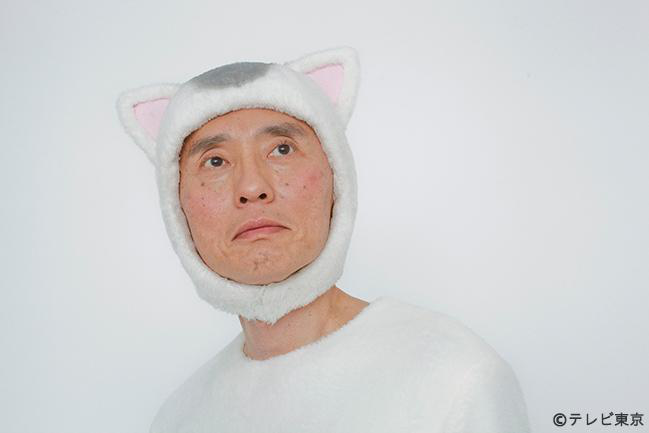

ship


In [17]:
!wget https://www.tv-tokyo.co.jp/txcms/media/others/1f/26/ae3084e212f5da80690e197f49a2.jpg
img_path='ae3084e212f5da80690e197f49a2.jpg'
img=Image.open(img_path)
ipd.display(img)
w,h=img.size
pad_for_h=int((w-h)/2)
paded_img=add_margin(img,pad_for_h,0,pad_for_h,0,(0,0,0))
resized_img=paded_img.resize((32,32))
normalized_img=np.divide(resized_img,255.0)
x_img=np.array([normalized_img])
y_pred=model.predict(x_img)
print(label[y_pred.argmax()])

--2021-01-15 01:31:39--  https://i.redd.it/5kd7k8708fwy.jpg
Resolving i.redd.it (i.redd.it)... 151.101.1.140, 151.101.65.140, 151.101.129.140, ...
Connecting to i.redd.it (i.redd.it)|151.101.1.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97872 (96K) [image/jpeg]
Saving to: ‘5kd7k8708fwy.jpg’

5kd7k8708fwy.jpg    100%[===================>]  95.58K  --.-KB/s    in 0.009s  

2021-01-15 01:31:39 (10.0 MB/s) - ‘5kd7k8708fwy.jpg’ saved [97872/97872]



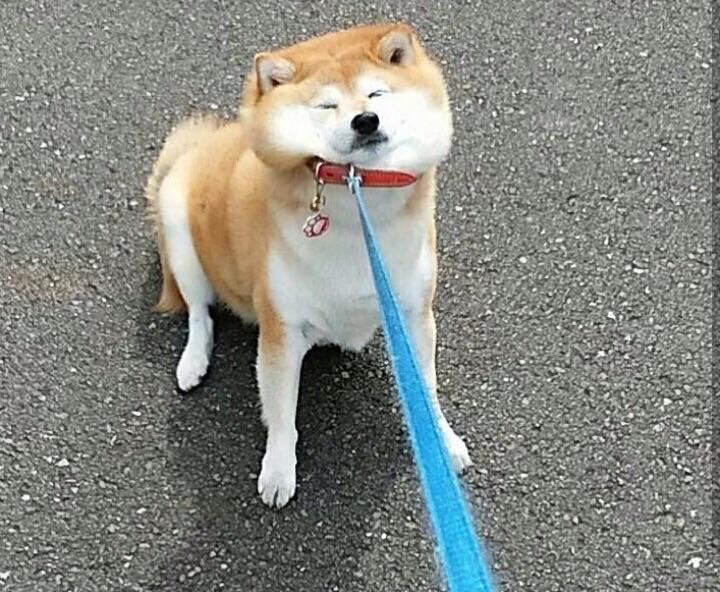

horse


In [18]:
!wget https://i.redd.it/5kd7k8708fwy.jpg
img_path='5kd7k8708fwy.jpg'
img=Image.open(img_path)
ipd.display(img)
w,h=img.size
pad_for_h=int((w-h)/2)
paded_img=add_margin(img,pad_for_h,0,pad_for_h,0,(0,0,0))
resized_img=paded_img.resize((32,32))
normalized_img=np.divide(resized_img,255.0)
x_img=np.array([normalized_img])
y_pred=model.predict(x_img)
print(label[y_pred.argmax()])